Задача: предсказание баллов ЕГЭ ученика в зависимости от количества лет стажа репетитора. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
X.shape

(2, 10)

In [4]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Метод наименьших квадратов (МНК)

In [5]:
X.T.shape

(10, 2)

In [6]:
all(X @ y == np.dot(X,y))

True

In [7]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [8]:
y_pred3 = W[0] * X[0] + W[1] * X[1]


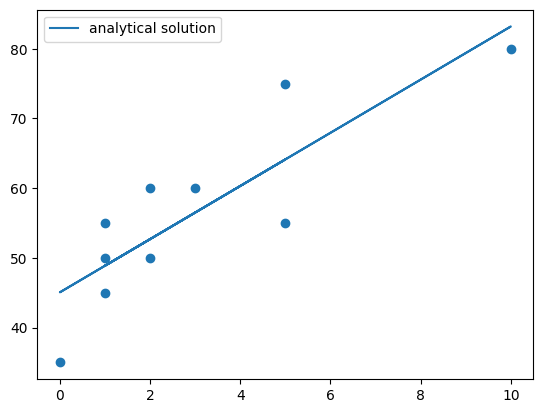

In [9]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred3, label='analytical solution')
plt.legend()
plt.show()

In [10]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [11]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.7875, 43.96875000000001)

Градиентный спуск

In [12]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [13]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [14]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

# Практическое задание

1. Подберите скорость обучения (alpha) и количество итераций.

In [15]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
Iteration #20: W_new = [ 9.49320908 10.25731657], MSE = 648.91
Iteration #30: W_new = [11.85740092  9.83349244], MSE = 570.46
Iteration #40: W_new = [13.86876921  9.46898661], MSE = 508.03
Iteration #50: W_new = [15.59085668  9.15672679], MSE = 457.73
Iteration #60: W_new = [17.07337653  8.88789585], MSE = 416.77
Iteration #70: W_new = [18.35601294  8.65530964], MSE = 383.06
Iteration #80: W_new = [19.47073522  8.45317196], MSE = 355.08
Iteration #90: W_new = [20.44350656  8.27677488], MSE = 331.65


Решение:

In [33]:
def find_good_alpha(X, y, alpha):
    n = X.shape[1]
    W = np.array([1, 0.5])
    num_of_iter = 0
    min_error = np.inf
    error = 0
    stop = True
    while stop:
        num_of_iter += 1
        y_pred = W @ X
        error = calc_mse(y, y_pred)
        if min_error - error > 0.0:
            min_error = error
        else:
            print(f'Количество итераций: {num_of_iter}, веса: {W}, среднеквадратичная ошибка: {min_error}')
            stop = False
        
        for i in range(W.shape[0]):
            W[i] -= alpha * (1/n * 2 * np.sum(X[i]*(y_pred - y)))
        if num_of_iter % 100 ==0:
            print(num_of_iter, W, error)
    return W, min_error
        
    
    
    

In [39]:
alpha = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for i in alpha:
    print(f"При значении alpha = {i}:")
    W, mse = find_good_alpha(X, y, i)

При значении alpha = 0.01:
100 [28.22929764  6.86494171] 179.89501370640295
200 [38.32845066  5.03361602] 65.72191623045093
300 [42.36857287  4.30100215] 47.450051024147385
400 [43.98480618  4.00792316] 44.525885301240166
500 [44.63137328  3.89067818] 44.05791199482176
600 [44.89002963  3.84377484] 43.98301917537428
700 [44.99350398  3.82501136] 43.97103358917125
800 [45.03489844  3.81750512] 43.969115457664245
900 [45.05145812  3.81450228] 43.968808486572826
1000 [45.05808274  3.813301  ] 43.96875935998757
1100 [45.0607329   3.81282044] 43.968751497939834
1200 [45.06179308  3.81262819] 43.96875023972508
1300 [45.0622172   3.81255128] 43.96875003836477
1400 [45.06238687  3.81252052] 43.96875000613976
1500 [45.06245474  3.81250821] 43.96875000098258
1600 [45.06248189  3.81250328] 43.96875000015726
1700 [45.06249276  3.81250131] 43.96875000002515
1800 [45.0624971   3.81250053] 43.968750000004036
Количество итераций: 1886, веса: [45.06249867  3.81250024], среднеквадратичная ошибка: 43.968

Получаем самое минимальное значение mse = 43.96875000000084 было получено за 1886 итераций при alpha = 0.01.
Но при alpha = 0.05, mse = 43.96875000000021, что очень близко по значению, 
но с гораздо меньшим количеством итераций, а именно 386. Поэтому можно считать, 
что alpha = 0.05 является оптимальным значением.

*2. В этом коде мы избавляемся от итераций по весам, но здесь есть ошибка, исправьте её.

In [40]:
# Исходный код задания 
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#     for k in range(W.shape[0]):
#         W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


Исправление ошибки

In [44]:
# Исправленный код 
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
#уберем строку с Wpred, так как она вообще не используется в коде и никак на него не влияет
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y), axis = 1))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27
